In [1]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np
import os
from IPython.display import clear_output
# Stats
from scipy.stats import mannwhitneyu

In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

In [2]:
# Set filepath
REPOSITORY='/home/ebb505/ARE_Project/are-logs/temp_0826/'
TRAITFILE='sparsenessAllRobotsTrait.csv'
SYMFILE='sparsenessAllRobotsSym.csv'
SPAFILE='sparsenessAllRobotsMat.csv'
print('Filepath: ' + REPOSITORY)

Filepath: /home/ebb505/ARE_Project/are-logs/temp_0826/


In [3]:
# Import data
traitData = []
with open(REPOSITORY + TRAITFILE, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        traitData.append(row[:]) # Last character is empty for some reason
symData = []
with open(REPOSITORY + SYMFILE, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        symData.append(row[:]) # Last character is empty for some reason
spaData = []
with open(REPOSITORY + SPAFILE, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        spaData.append(row[:]) # Last character is empty for some reason

In [4]:
POPULATION = 100
REPLICATES = len(traitData)
#evaluations = len(my_replicates[0])
EVALUATIONS = 30000
FEATURES = len(traitData[0][0])
GENERATIONS = int(EVALUATIONS / POPULATION)
interval=1000
rangeValues = range(0,EVALUATIONS,interval)
lenRange = len(rangeValues)
print("Replicates: ", REPLICATES, "Number of evaluations: ", EVALUATIONS, "Features size: ", FEATURES)


Replicates:  20 Number of evaluations:  30000 Features size:  3


In [5]:
# Check all replicates have the minimum number of evaluations
for i in range(REPLICATES):
    if len(traitData[i]) < EVALUATIONS:
        print("Error!")

In [6]:
# Process data
traitArray = np.array([[float(y) for y in x] for x in traitData]) # Convert to array
symArray = np.array([[float(y) for y in x] for x in symData]) # Convert to array
spaArray = np.array([[float(y) for y in x] for x in spaData]) # Convert to array

In [7]:
print(spaData)
print(spaArray)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
print(np.mean(np.mean(traitArray, axis = 1)))
print(np.mean(np.mean(symArray, axis = 1)))
print(np.mean(np.mean(spaArray, axis = 1)))

0.00817916270606313
0.08682769367512747
0.1140759592048751


In [32]:
# https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
# stat, p = mannwhitneyu(lhs_sparseness_mean, clustersort_sparseness_mean)
# print('Statistics=%.3f, p=%.3f' % (stat, p))
# # interpret
# alpha = 0.05
# if p > alpha:
#     print('Same distribution (fail to reject H0)')
# else:
#     print('Different distribution (reject H0)')
# # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
# stat, p = mannwhitneyu(clusterrand_sparseness_mean, clustersort_sparseness_mean)
# print('Statistics=%.3f, p=%.3f' % (stat, p))
# # interpret
# alpha = 0.05
# if p > alpha:
#     print('Same distribution (fail to reject H0)')
# else:
#     print('Different distribution (reject H0)')

Statistics=111.000, p=0.008
Different distribution (reject H0)
Statistics=196.000, p=0.462
Same distribution (fail to reject H0)


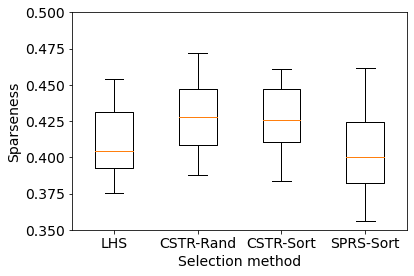

In [35]:
# Plot stuff
xValues = list(range(POPULATION, EVALUATIONS, POPULATION))
xValues = [x/POPULATION for x in xValues]
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}

plt.rc('font', **font)
plt.figure(0)

plt.boxplot([lhs_sparseness_mean, clusterrand_sparseness_mean, clustersort_sparseness_mean, spasort_sparseness_mean])
# plt.boxplot([lhs_sparseness_mean, clusterrand_sparseness_mean, clustersort_sparseness_mean])

plt.xlabel('Selection method')
plt.ylabel('Sparseness')

axes = plt.gca()
axes.set_ylim([0.35,0.5])

plt.xticks([1, 2, 3, 4], ['LHS', 'CSTR-Rand', 'CSTR-Sort', 'SPRS-Sort'])

plt.savefig(REPOSITORY+'SelectionComparison.png',dpi=200)